In [49]:
import pandas as pd

In [50]:
data_frame = pd.read_csv("stock-price/AAPL.csv")
data_frame.set_index("Date", inplace = True)

data_frame.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900
2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200
2006-12-05,13.092857,13.190000,12.981428,91.269997,13.038571,165709600
2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100
2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900


In [51]:
dataframe_OHLC_mean = pd.DataFrame({"OHLC Mean": (data_frame["Open"] + data_frame["High"] + data_frame["Low"] + data_frame["Close"]) / 4})

In [52]:
data_frame = data_frame.join(dataframe_OHLC_mean)

In [53]:
data_frame.head()

,Open,High,Low,Close,Adj Close,Volume,OHLC Mean
Date,,,,,,,
2006-12-01,13.114285,13.190000,12.871428,91.320000,13.045714,198769900,32.623928
2006-12-04,13.125714,13.150000,12.928572,91.120003,13.017143,177384200,32.581072
2006-12-05,13.092857,13.190000,12.981428,91.269997,13.038571,165709600,32.633571
2006-12-06,12.948571,13.055715,12.810000,89.830002,12.832857,159546100,32.161072
2006-12-07,12.861428,12.928572,12.414286,87.040001,12.434286,251206900,31.311072


In [54]:
import sklearn
from sklearn import svm, preprocessing

data_frame = sklearn.utils.shuffle(data_frame)

Xs = data_frame.drop("OHLC Mean", axis = 1).values
Xs = preprocessing.scale(Xs)

Ys = data_frame["OHLC Mean"].values

test_size = 300

Xs_train = Xs[:-test_size]
Ys_train = Ys[:-test_size]

Xs_test = Xs[:-test_size]
Ys_test = Ys[:-test_size]

c:\users\cigan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [55]:
classifier = svm.SVR(kernel="linear", gamma="scale")

In [56]:
classifier.fit(Xs_train, Ys_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
classifier.score(Xs_test, Ys_test)

0.9999991212948028

In [58]:
for Xs, Ys in zip(Xs_test, Ys_test):
    print(f"Model {classifier.predict([Xs])[0]}, Actual {Ys}")

Model 110.72015260156029, Actual 110.8199995
Model 121.1951477668813, Actual 121.16464125
Model 202.8327381748029, Actual 202.76607325
Model 167.59730412119234, Actual 167.65785775
Model 192.4424065014934, Actual 192.43964375
Model 103.10559767460221, Actual 103.13499825
Model 147.9313010524942, Actual 147.98036075000002
Model 30.706836348762096, Actual 30.661071749999998
Model 111.32977194545614, Actual 111.33749975
Model 188.298335649014, Actual 188.27071175
Model 151.63533244754151, Actual 151.68071375
Model 39.361930757283844, Actual 39.31357275
Model 85.87268872140969, Actual 85.85107325000001
Model 185.80800236433407, Actual 185.78499975
Model 62.029708300721815, Actual 61.99035675
Model 48.66604277978013, Actual 48.618572
Model 44.52783653368101, Actual 44.477500750000004
Model 96.29883287199252, Actual 96.29000075
Model 106.12144284540771, Actual 106.057499
Model 238.4477856143341, Actual 238.52321225
Model 162.60553946989313, Actual 162.53179175
Model 181.54906181742018, Actua

Model 71.39739594700359, Actual 71.35142475
Model 98.79862799826424, Actual 98.79750050000001
Model 66.72471409124717, Actual 66.688929
Model 51.98289605959543, Actual 51.90607125
Model 143.20126588538434, Actual 143.24500275
Model 108.53265747298006, Actual 108.49750125
Model 189.96955473756998, Actual 189.90893350000002
Model 31.5142168424985, Actual 31.458571749999997
Model 127.65173098271069, Actual 127.70000074999999
Model 65.87360713630449, Actual 65.821427
Model 115.21680308964304, Actual 115.14999974999999
Model 164.10047065794822, Actual 164.10857199999998
Model 52.36558952096343, Actual 52.304287
Model 62.19361352651195, Actual 62.15928374999999
Model 92.63424998150543, Actual 92.59892875
Model 220.47635728633514, Actual 220.481426
Model 101.75978286183624, Actual 101.68
Model 96.33876205294663, Actual 96.38500025000002
Model 46.40082235585494, Actual 46.3875
Model 194.25290376917638, Actual 194.1939335
Model 130.97355404870132, Actual 130.97179025000003
Model 94.180501275850

Model 68.71638079461019, Actual 68.688572
Model 178.01738045074018, Actual 178.036787
Model 143.87678299446858, Actual 143.85892875000002
Model 120.9483516443519, Actual 120.90643025
Model 99.88452733842715, Actual 99.91
Model 60.884687577273, Actual 60.84428275
Model 212.69699157120078, Actual 212.64750099999998
Model 189.64633176745735, Actual 189.6635705
Model 50.94216744211825, Actual 50.89964475000001
Model 32.185451831295325, Actual 32.13142875
Model 91.98939111882251, Actual 92.00000349999999
Model 109.97457655044039, Actual 109.95035475
Model 32.6561227011255, Actual 32.59178575
Model 162.23938816352032, Actual 162.2289305
Model 50.72143606599301, Actual 50.691431
Model 47.07257360667901, Actual 47.025001
Model 41.20432384155809, Actual 41.1567855
Model 60.340839384030694, Actual 60.2832145
Model 179.87075223595025, Actual 179.85499950000002
Model 33.8918698110711, Actual 33.843928
Model 89.74828052437232, Actual 89.73749925000001
Model 177.2963324746874, Actual 177.34393325000

Model 71.14411336859777, Actual 71.125713
Model 59.360141500129316, Actual 59.3078575
Model 194.66345614212722, Actual 194.68751150000003
Model 174.96144802083063, Actual 175.0396385
Model 96.56012759608691, Actual 96.545
Model 67.62893305476557, Actual 67.573571
Model 55.0212245278459, Actual 54.96428675
Model 70.35411830871853, Actual 70.34785975
Model 39.15218688494484, Actual 39.08857
Model 35.500735449184404, Actual 35.5135705
Model 139.16969452246585, Actual 139.1510685
Model 193.39194787850198, Actual 193.44393175000002
Model 137.78363613789045, Actual 137.79714775
Model 33.520469996695226, Actual 33.4592855
Model 50.06876837327719, Actual 50.027142999999995
Model 164.75168841881313, Actual 164.74928875
Model 236.64869045073078, Actual 236.6814215
Model 118.38428671630459, Actual 118.46749875
Model 67.35793693678187, Actual 67.30499975000001
Model 206.1150072474876, Actual 206.0692805
Model 124.63097995266475, Actual 124.6203575
Model 226.60527204279583, Actual 226.6028537499999

Model 96.29031279213622, Actual 96.20500175
Model 60.494532369468686, Actual 60.423571249999995
Model 45.08207475273527, Actual 45.028572499999996
Model 89.63970973396565, Actual 89.58714499999999
Model 203.98093374493521, Actual 204.0192735
Model 124.79951664416726, Actual 124.78428749999999
Model 63.23080083310813, Actual 63.18035675
Model 93.90558845678771, Actual 93.86750225
Model 56.70397063067291, Actual 56.6557135
Model 51.74477264109215, Actual 51.7003565
Model 73.69764029098354, Actual 73.70785825
Model 109.94907607867502, Actual 109.92714699999999
Model 66.21892116861353, Actual 66.165712
Model 115.68032165519494, Actual 115.69000050000001
Model 30.62085081139395, Actual 30.57357175
Model 114.74296187885585, Actual 114.6625005
Model 94.35707447955399, Actual 94.27499975
Model 152.60862359097877, Actual 152.61964324999997
Model 128.17232131305445, Actual 128.1850015
Model 202.62983722321314, Actual 202.61893475
Model 107.39064131682281, Actual 107.37321475
Model 186.9376862932

Model 59.05544819641022, Actual 59.02143075
Model 99.78357504288695, Actual 99.71749875
Model 53.037757228762416, Actual 52.982143750000006
Model 179.2882197463981, Actual 179.3192865
Model 117.12473756014131, Actual 117.22249975
Model 142.68030741859073, Actual 142.64821725
Model 117.9095177181735, Actual 117.93999875
Model 101.35698596858914, Actual 101.3099995
Model 70.31022908735181, Actual 70.28678500000001
Model 224.53397535513687, Actual 224.54500175
Model 122.05551103376933, Actual 122.0135735
Model 104.05232058711627, Actual 104.1549985
Model 120.1098650731536, Actual 120.08214275
Model 169.508611226166, Actual 169.4971465
Model 153.55560053554132, Actual 153.595359
Model 89.9456554502951, Actual 89.91786075
Model 162.6068761589844, Actual 162.6392805
Model 127.55139861365964, Actual 127.65749725
Model 44.336119965223205, Actual 44.287501750000004
Model 111.47261042109658, Actual 111.40820975
Model 210.1201346826789, Actual 210.17821300000003
Model 193.251051571801, Actual 193

In [59]:
high_data_frame = data_frame[["High", "Low"]]
high_data_frame = high_data_frame.cumsum()

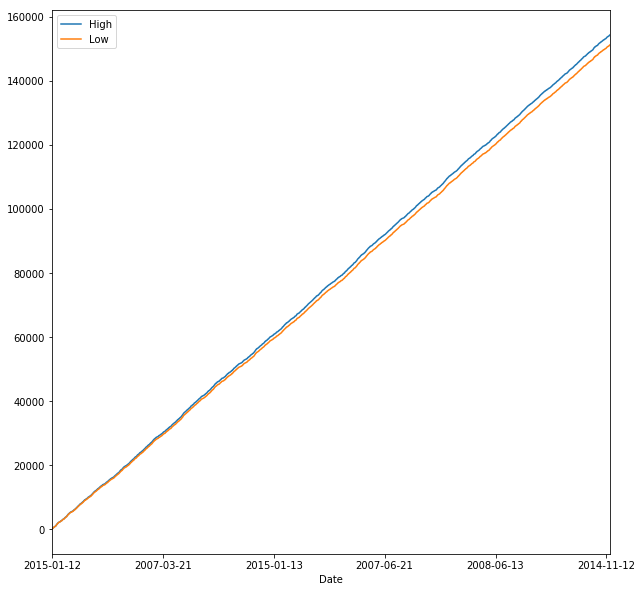

In [60]:
high_data_frame.plot(figsize=(10, 10))

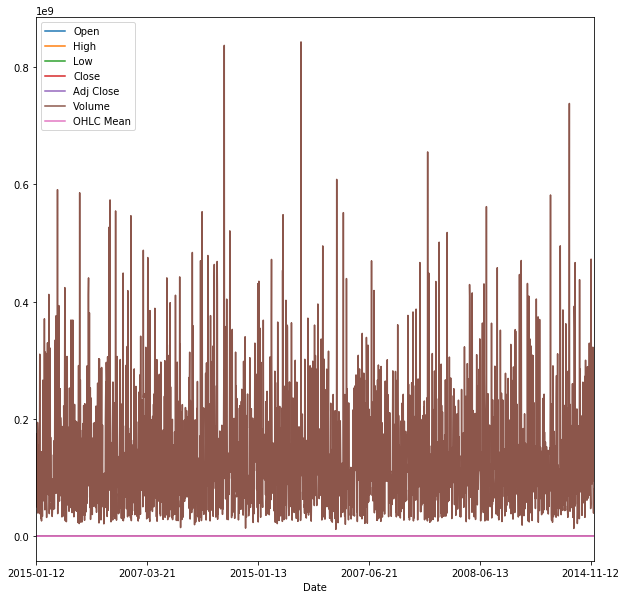

In [63]:
data_frame.plot(figsize=(10, 10))

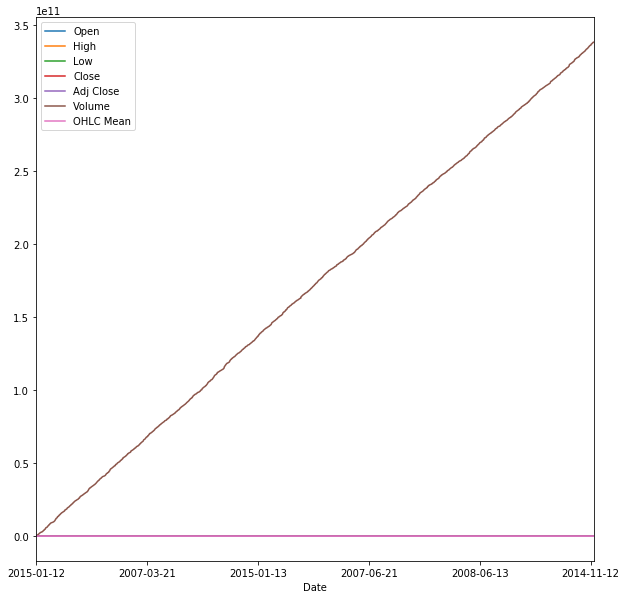

In [64]:
data_frame = data_frame.cumsum()
data_frame.plot(figsize=(10, 10))